<a href="https://colab.research.google.com/github/Abhimanu341/Be-my-Valentine/blob/main/EDA_Shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/shopping_trends.csv")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


**Customer Purchase Data - Overview & Initial Understanding**


# Description:
This dataset contains information about customer purchases, including:

**Customer Demographics**: Age, Gender, Location


**Product Details**: Item Purchased, Category, Size, Color, Season


**Purchase Information**: Purchase Amount, Payment Method, Shipping Type, Discount Applied, Promo Code Used


**Customer Behavior**: Review Rating, Subscription Status, Preferred Payment Method, Frequency of Purchases, Previous Purchases


This data will be used to analyze customer preferences, spending behavior, and trends in purchasing patterns.

In [10]:
df.tail(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### **Descriptive Statistics - Summary of Key Numeric Columns**  

**Description:**  
This statistical summary provides insights into the distribution of key numerical variables in the dataset.  

1. **Customer ID:** Ranges from 1 to 3900, confirming a total of 3,900 unique customers.  
2. **Age:**  
   - Average age: **44 years**  
   - Youngest customer: **18 years**, oldest: **70 years**  
   - Majority of customers fall between **31 (25th percentile) and 57 (75th percentile).**  
3. **Purchase Amount (USD):**  
   - Average purchase: **$59.76**  
   - Minimum purchase: **$20**, maximum: **$100**  
   - Most customers spend between **$39 (25th percentile) and $81 (75th percentile).**  
4. **Review Rating:**  
   - Average rating: **3.75 out of 5**  
   - Minimum rating: **2.5**, maximum: **5**  
   - Majority of ratings fall between **3.1 and 4.4**, indicating a general trend towards positive reviews.  
5. **Previous Purchases:**  
   - Average number of previous purchases: **25**  
   - Some customers have made as few as **1 purchase**, while frequent shoppers have made **up to 50 purchases.**  

🔹 **Key Takeaways:**  
- The dataset includes a diverse range of customers across different age groups.  
- Purchase amounts are relatively evenly distributed, with a peak around $60.  
- Review ratings are mostly positive.  
- Some customers are frequent shoppers, making up to 50 purchases.


In [12]:
df.shape

(3900, 19)

In [13]:
df["Gender"].value_counts()

,count
Gender,
Male,2652
Female,1248


### **Gender Distribution in Customer Data**  

**Description:**  
This summary provides the count of customers based on gender:  

- **Male Customers:** **2,652** (≈ 68%)  
- **Female Customers:** **1,248** (≈ 32%)  

🔹 **Key Takeaways:**  
- The dataset has a **higher proportion of male customers** compared to female customers.  
- This could indicate a **male-dominated customer base**, or it might reflect the type of products being sold.  
- Further analysis can explore **differences in purchasing behavior, spending patterns, and preferences** across genders.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### **Dataset Overview & Structure**  

🔹 **Key Takeaways:**  
- **No missing values** detected in the dataset (all columns have 3,900 non-null entries).  
- Contains a mix of **numerical** and **categorical** features, making it suitable for both **statistical analysis** and **classification modeling**.  
- The dataset has potential for insights on **customer behavior, spending patterns, seasonal trends, and payment preferences**.

In [15]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [16]:
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [17]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

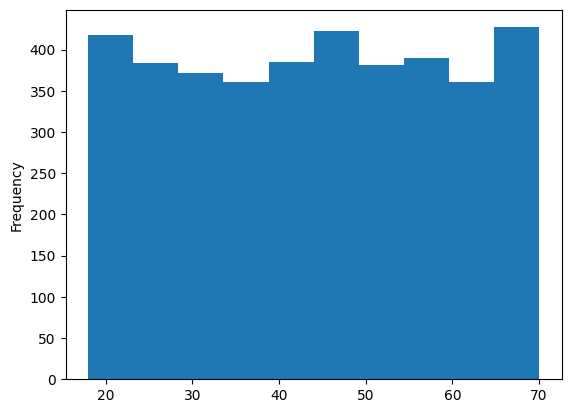

In [18]:
df["Age"].plot(kind="hist")

The histogram plot you provided shows the age distribution within a dataset.

Each bar represents the frequency of ages within specific intervals, ranging from approximately 20 to 70 years old.

The y-axis shows the frequency, while the x-axis represents the age intervals.

In [19]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

<Axes: xlabel='Gender'>

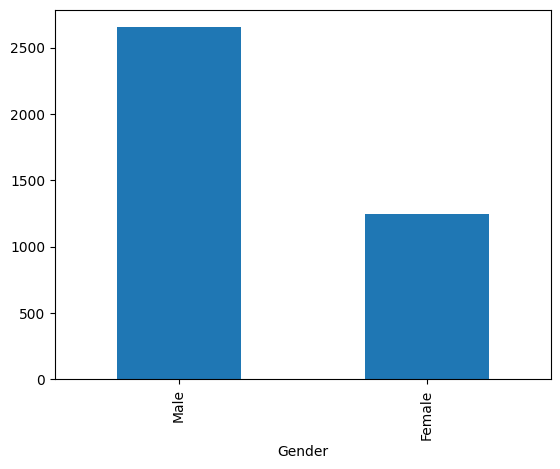

In [20]:
df['Gender'].value_counts().plot(kind="bar")

The bar for "Male" is significantly taller, indicating a higher count of approximately 2500.

The bar for "Female" is around 1500.

In [21]:
df.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False).head(2)

,Purchase Amount (USD)
Category,
Footwear,60.255426
Clothing,60.025331


In [22]:
df['Category']

,Category
0,Clothing
1,Clothing
2,Clothing
3,Footwear
4,Clothing
...,...
3895,Clothing
3896,Accessories
3897,Accessories
3898,Footwear


#Sorting Data by Review Rating

In [23]:
df.sort_values("Review Rating", ascending=False,inplace=True)

In [24]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,1665,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,PayPal,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,1278,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Debit Card,Express,Yes,Yes,5,Venmo,Quarterly
2632,2633,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Venmo,Next Day Air,No,No,14,Cash,Annually
965,966,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Debit Card,Store Pickup,Yes,Yes,10,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,54,Male,Jacket,Outerwear,34,Utah,M,Maroon,Fall,2.5,No,Venmo,Next Day Air,Yes,Yes,35,PayPal,Quarterly
3473,3474,63,Female,Dress,Clothing,40,Kansas,M,Cyan,Spring,2.5,No,Credit Card,Express,No,No,11,Cash,Weekly
1449,1450,18,Male,Socks,Clothing,41,New York,L,Lavender,Winter,2.5,No,Debit Card,Store Pickup,Yes,Yes,20,Cash,Every 3 Months
133,134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Venmo,Annually


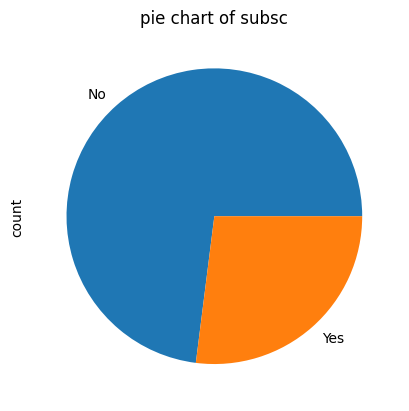

In [25]:
df['Subscription Status'].value_counts().plot(kind="pie")
plt.title("pie chart of subsc")
plt.show()

This pie chart visualizes the distribution of customers' subscription status, showing the proportion of customers who are subscribed ("Yes") versus those who are not ("No"). It helps identify the subscription trends among the customer base.

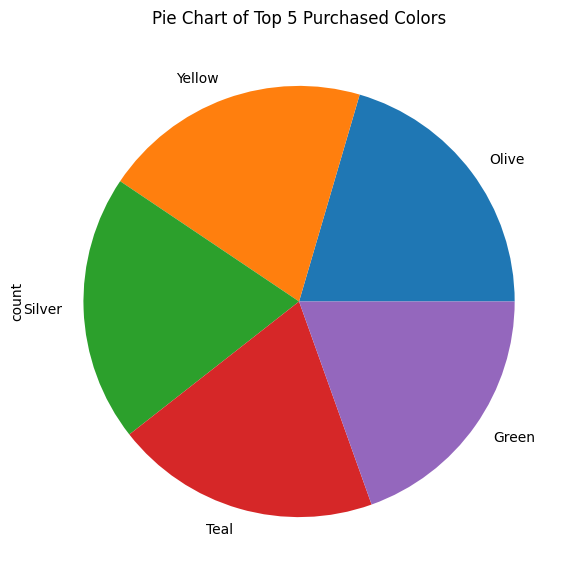

In [58]:
df['Color'].value_counts().head().plot(kind="pie", figsize=(7,7))
plt.title("Pie Chart of Top 5 Purchased Colors")
plt.show()


This pie chart displays the top 5 most frequently purchased colors by customers. It provides insight into color preferences and can help in understanding popular trends in customer choices.

In [48]:
#df.head(75).plot(x="Previous Purchases",y="Review Rating",kind="scatter")

In [28]:
df.groupby("Season")["Purchase Amount (USD)"].sum()

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


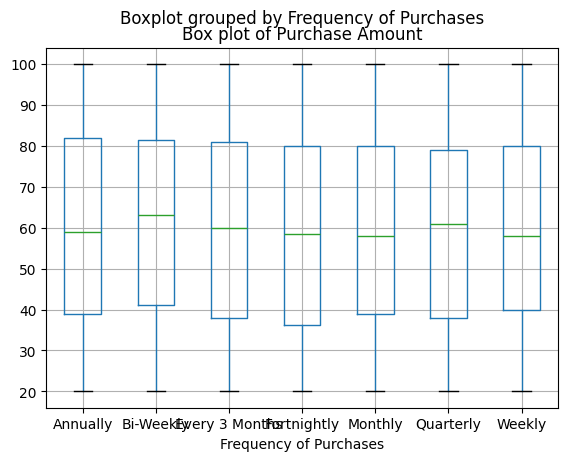

In [29]:
df.boxplot(column="Purchase Amount (USD)",by="Frequency of Purchases")
plt.title("Box plot of Purchase Amount")
plt.show()

# Key Observations

**Median Purchase Amount**: Quickly compare medians across different frequencies. If one category’s median is notably higher, that group typically spends more per purchase.


**Spread of Data**: The height of each box shows the variability in purchase amounts. A taller box or longer whiskers indicate a wider range of spending.


**Outliers**: Any points lying beyond the whiskers suggest unusually high or low purchase amounts within that frequency group.

In [30]:
df["Preferred Payment Method"].value_counts().sort_values(ascending=False)

,count
Preferred Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


In [31]:
pd.pivot_table(df,values="Purchase Amount (USD)",index="Location",columns="Item Purchased",aggfunc="mean").head(10)

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.00,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.60,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.60,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.00,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.40,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.00,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.00,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.00,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.00,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


In [32]:
df.groupby("Size")["Purchase Amount (USD)"].sum()

,Purchase Amount (USD)
Size,
L,61667
M,105167
S,40468
XL,25779


In [33]:
df.groupby("Payment Method")["Purchase Amount (USD)"].sum()

,Purchase Amount (USD)
Payment Method,
Bank Transfer,37123
Cash,38833
Credit Card,42567
Debit Card,37118
PayPal,37449
Venmo,39991


In [34]:
df.groupby("Discount Applied")["Review Rating"].mean()

,Review Rating
Discount Applied,
No,3.757715
Yes,3.739654


In [35]:
df.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [36]:
df.groupby("Frequency of Purchases")["Previous Purchases"].median()

,Previous Purchases
Frequency of Purchases,
Annually,24.0
Bi-Weekly,24.0
Every 3 Months,24.0
Fortnightly,26.0
Monthly,25.0
Quarterly,28.0
Weekly,26.0


In [37]:
df.groupby("Season")["Review Rating"].mean()

,Review Rating
Season,
Fall,3.729949
Spring,3.790591
Summer,3.725654
Winter,3.752111


In [38]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

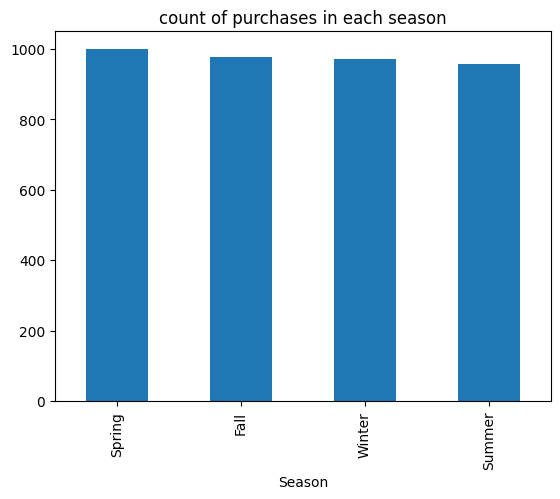

In [39]:
df['Season'].value_counts().plot(kind="bar")
plt.title("count of purchases in each season")
plt.show()

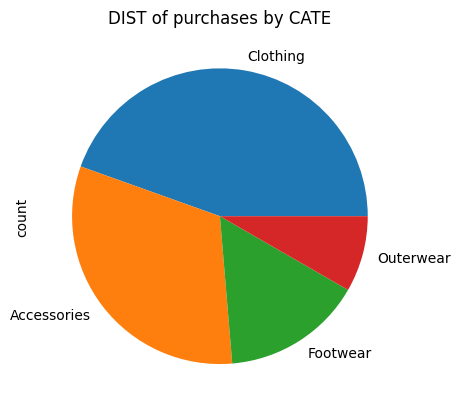

In [40]:
df['Category'].value_counts().plot(kind="pie")
plt.title("DIST of purchases by CATE")
plt.show()

#Dist of clothing is more other than wear|

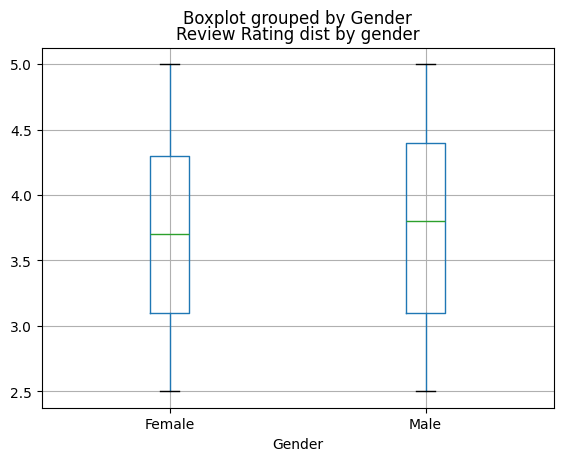

In [41]:
df.boxplot(column="Review Rating",by="Gender")
plt.title("Review Rating dist by gender")
plt.show()

#Male boxplot shows the high amount of rating

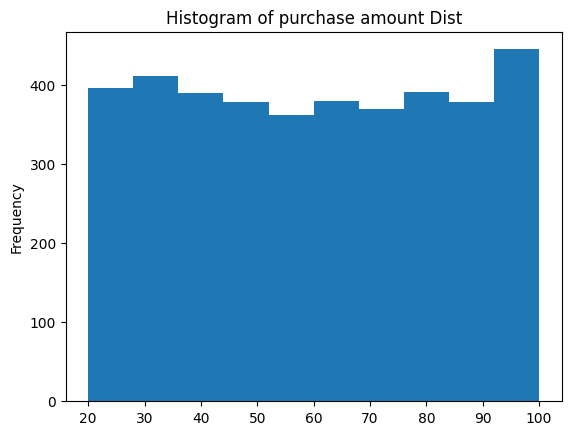

In [42]:
df["Purchase Amount (USD)"].plot(kind="hist",bins=10)
plt.title("Histogram of purchase amount Dist")
plt.show()

Helps identify the most common purchase amount range

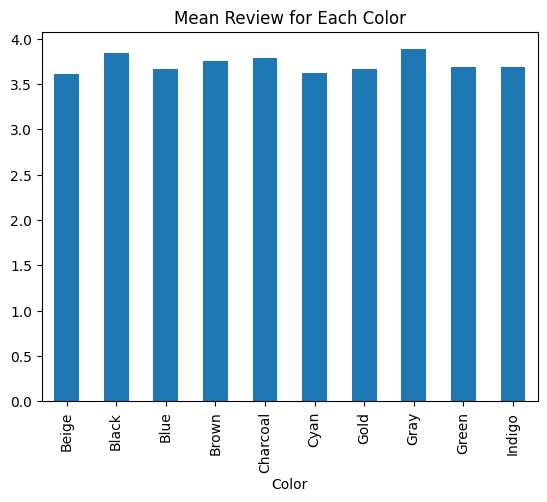

In [43]:
df.groupby("Color")["Review Rating"].mean().head(10).plot(kind="bar")
#plt.xlabel("Color")
#plt.ylabel("Mean Review Rating")
plt.title("Mean Review for Each Color")
plt.show()

**Key Insight:**

The bar chart highlights which colors receive the highest and lowest average ratings among the first 10 listed colors.
It helps identify customer satisfaction trends that may be associated with specific colors.

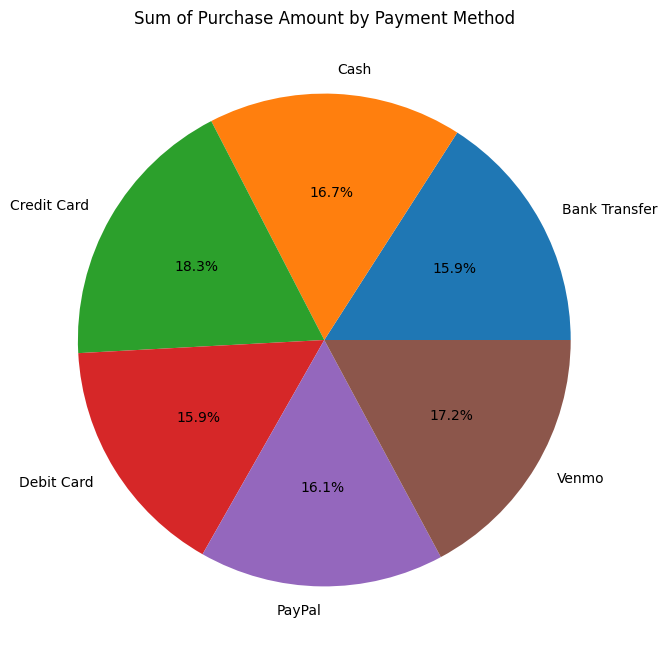

In [59]:
df.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(
    kind="pie", autopct='%1.1f%%', figsize=(8, 8))
plt.title("Sum of Purchase Amount by Payment Method")
plt.ylabel("")
plt.show()


**Insights:**


This visualization helps understand which payment methods contribute the most to total sales.

A dominant slice indicates the most preferred payment method among customers.

If some slices are very small, it means those payment methods are less commonly used.

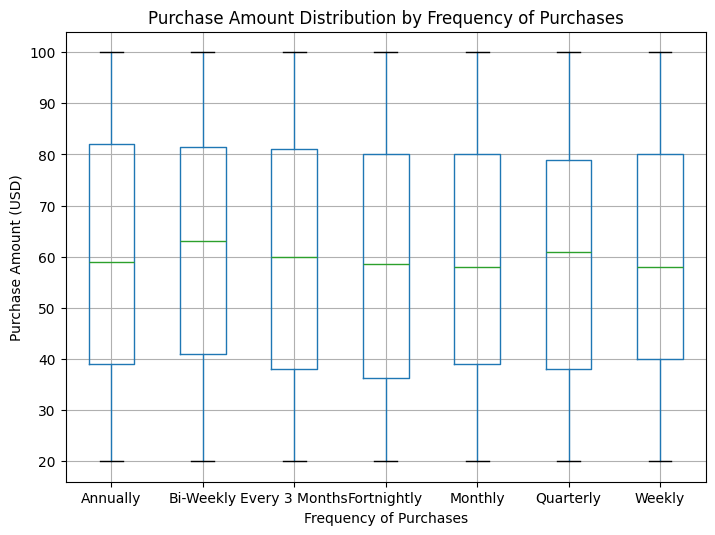

In [62]:
df.boxplot(column="Purchase Amount (USD)", by="Frequency of Purchases", figsize=(8,6))
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Frequency of Purchases", fontsize=12)
plt.suptitle("")  # Removes automatic group title
plt.show()


**Insights:**


Comparing Medians: Higher or lower median purchase amounts for different frequency categories.


Variability: Some categories might have wider boxes, indicating higher purchase variation.


Outliers: If present, they indicate unusual spending behavior.

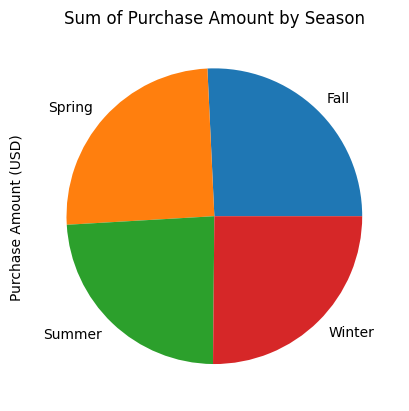

In [64]:
df.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind="pie")
# plt.xlabel("Season")
# plt.ylabel("Sum of Purchase Amount (USD)")
plt.title("Sum of Purchase Amount by Season")
plt.show()

**Insights:**


Seasonal trends: Identify which season has the highest/lowest total purchase amount.


Customer spending behavior: See if sales peak during specific seasons (e.g., holidays, summer, etc.).


Business strategy: Companies can target high-spending seasons for promotions.